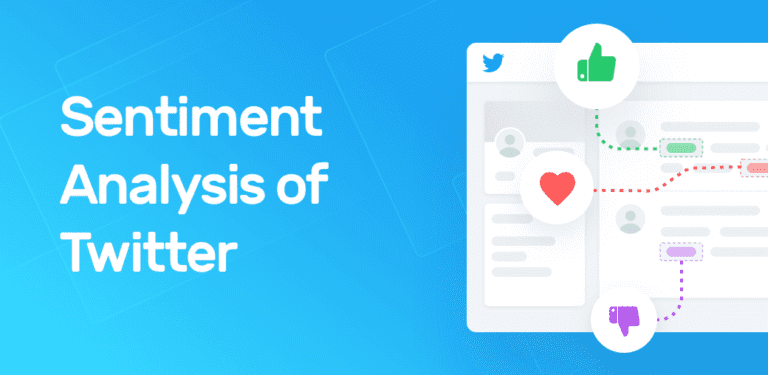

**DASHBOARD DEVELOPMENT**

* Twitter Sentiment Analysis

**Introduction to the Twitter Sentiment Analysis Dataset**

The Twitter Sentiment Analysis dataset contains a collection of tweets with sentiment labels. It is used to analyze public opinions, trends, and emotions expressed on Twitter. This dataset is valuable for understanding how users feel about a specific topic, brand, or event.

Key Features of the Dataset:
* Tweet_ID → Unique ID for each tweet.
* Timestamp & Date → When the tweet was posted.
* Username → The Twitter handle of the user.
* Tweet → The actual text content of the tweet.
* Sentiment → The categorized sentiment of the tweet (Positive, Negative, Neutral).

The dataset can be used for social media monitoring, customer feedback analysis, brand perception tracking, and trend analysis.

Visualization Overview

To better understand the dataset, we created visualizations in Tableau and Python .

* Sentiment Distribution (Bar Chart)

Displays the count of Positive, Negative, and Neutral tweets.
Helps understand the overall sentiment trend.

* Sentiment Trend Over Time (Line Chart)

Shows how sentiment changes over days or months.
Useful for tracking public reactions to events.

* Most Active Users (Bar Chart)

Identifies the top users tweeting the most.
Helps in influencer and brand engagement analysis.

* Word Cloud (Most Frequent Words in Tweets)

Visualizes common words used in tweets.
Helps in topic analysis (e.g., trending words).

In [ ]:
!pip install seaborn plotly wordcloud vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00


**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_sample.csv')

In [ ]:
# Check dataset structure
data.head()


,Tweet_ID,Timestamp,Date,Query,Username,Tweet,Sentiment
0,0,2323537917,Thu Jun 25 00:52:47 PDT 2009,NO_QUERY,timofuchs,@grazzly maaaaaate will you be at Glasto? Not ...,Neutral
1,4,1793289573,Thu May 14 02:06:48 PDT 2009,NO_QUERY,markdavidson,@Monkeylover35 Yeah. I had to get away for a b...,Positive
2,4,1695925043,Mon May 04 07:14:48 PDT 2009,NO_QUERY,Maekii,The World is just amazing!,Positive
3,0,2324216785,Thu Jun 25 02:35:25 PDT 2009,NO_QUERY,MissElisee,Just picked my sister up from work. she's al...,Neutral
4,0,2243617139,Fri Jun 19 13:40:45 PDT 2009,NO_QUERY,MissK20,I don't think changing my last name is meant t...,Neutral


**Sentiment Distribution (Bar Chart)**

<ipython-input-11-6bed328aa728>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




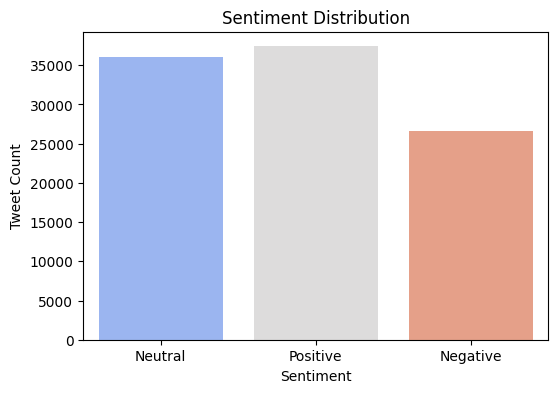

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.savefig("sentiment_distribution.png")  # Save as image
plt.show()

**Sentiment Trend Over Time (Line Chart)**

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

# Count tweets per day per sentiment
sentiment_trend = data.groupby(["Date", "Sentiment"]).size().reset_index(name="Count")

# Plot trend using Plotly
fig = px.line(sentiment_trend, x="Date", y="Count", color="Sentiment",
              title="Sentiment Trend Over Time")
plt.savefig("sentiment_trend.png")
fig.show()

<Figure size 640x480 with 0 Axes>

**Most Active Users (Top 10 Users by Tweet Count)**

<ipython-input-13-0b4617c9353b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




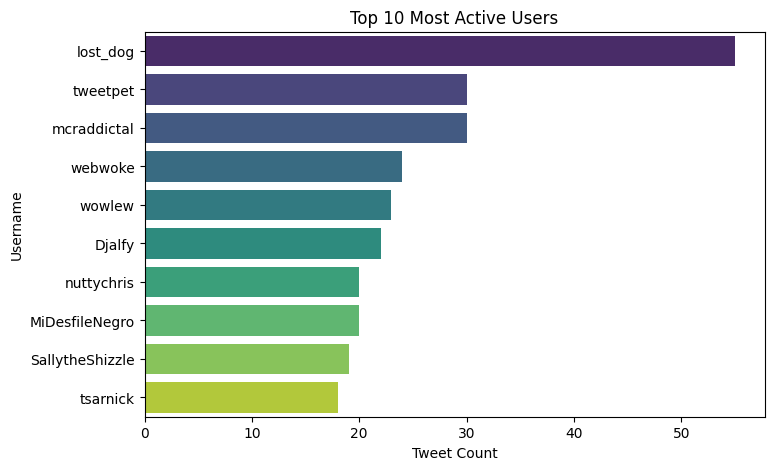

In [ ]:
top_users = data["Username"].value_counts().nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")
plt.title("Top 10 Most Active Users")
plt.xlabel("Tweet Count")
plt.ylabel("Username")
plt.savefig("top_users.png")
plt.show()


**Word Cloud of Tweets**

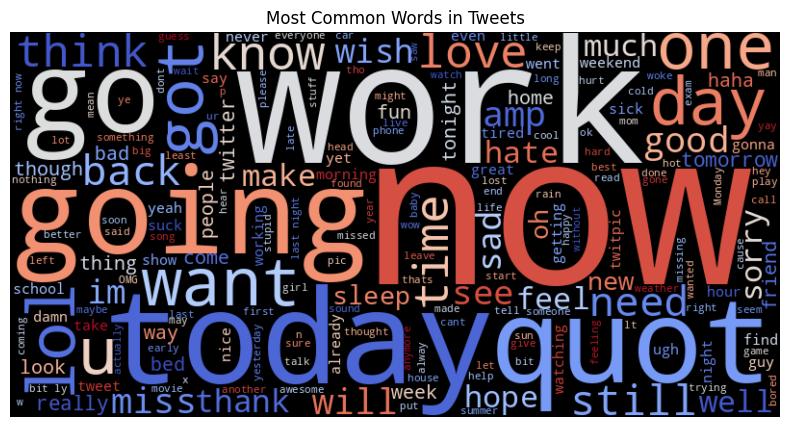

In [ ]:
all_text = " ".join(tweet for tweet in data["Tweet"])

wordcloud = WordCloud(width=800, height=400, background_color="black",
                      colormap="coolwarm", max_words=200).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.savefig("wordcloud.png")
plt.show()


**Conclusion**

The Twitter Sentiment Analysis dataset helps understand public opinion by analyzing tweets. Visualizations reveal key insights such as sentiment distribution, trends over time, top influencers, and common topics. These insights are valuable for businesses, marketers, and researchers to track customer feedback, brand perception, and social media trends.